# Load data
- 88 shuffles 

In [1]:
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker

import numpy as np
import os
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import subprocess



CL = "K562"
GENOME_BUILD = "hg38"

cCREPATH = f"/dors/capra_lab/projects/enhancer_ages/encode/data/ELS_combined_{CL}/ages/"
cCREFILE = f"syn_breaks_ELS_combined_{CL}_ages.bed"
cCRE = os.path.join(cCREPATH, cCREFILE)

#cCRE_TFBS_ONLY = f"{cCREPATH}enh_tfbs_only.txt"

SHUFPATH = f"/dors/capra_lab/projects/enhancer_ages/encode/data/ELS_combined_{CL}/shuffle/ages/"
SHUFFILE = f"syn_breaks_shuf-ELS_combined_{CL}.bed"
SHUFF = os.path.join(SHUFPATH, SHUFFILE)


RE = f"/dors/capra_lab/projects/enhancer_ages/landscape/results/cCRE/{CL}/"
stat_f = os.path.join(RE, "stat_{CL}_features.txt")


## Fonts

### add font

In [3]:
import matplotlib.font_manager as fm
fm._rebuild()


font_dirs = ["/dors/capra_lab/users/fongsl/", "/home/fongsl/.conda/envs/sfenv/fonts/open-fonts"]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    print(font_file)
    fm.fontManager.addfont(font_file)
font_names = [f.name for f in fm.fontManager.ttflist]
print(font_names)
plt.rcParams['font.family'] = 'Arial Unicode MS'

### test different fonts

Usure = False
if Usure is True:
    done = []
    for f in font_names:
        if f not in done:
            print(f)
            mpl.rcParams['font.family'] = f
            x = 1
            plt.bar(x, height = 1)
            plt.xlabel(f"{f}")
            plt.title(f"{f}")
            plt.ylabel("does it look okay?")
            plt.show()
            done.append(f)

/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/NotoSerifGeorgian-Medium.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/SymbolaForRobot0Mono.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/DejaVuSansMono-BoldOblique.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/Lato-SemiboldItalic.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/NotoSansDevanagari-Thin.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/NotoSansThai-Bold.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/SourcingCodePro-BlackItalic.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/InconsolataSugar-Italic.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/Lato-Thin.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/NotoSansMono-Thin.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/SourcingSansPro-ExtraLight.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/NotoSerif-Medium.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/NotoSansGeorgian-ExtraLight.ttf
/home/fongsl/.conda/envs/sfenv/fonts/

/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/SourceCodePro-Italic.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/NotoSansDevanagari-Black.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/SourceCodePro-Black.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/NotoSans-ExtraBold.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/NotoSans-Regular.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/XITS-Regular.otf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/SourceSansPro-SemiboldIt.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/InconsolataSugar-BoldItalic.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/NotoSansTamil-Light.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/SourcingCodePro-BoldItalic.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/SourceCodePro-BoldItalic.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/DavidLibre-Medium.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fonts/NotoSans-LightItalic.ttf
/home/fongsl/.conda/envs/sfenv/fonts/open-fon

## colors

In [14]:
#%%
yg = '#f7fcb9'
stemg = '#addd8e'
kellyg = '#31a354'

y = mcolors.to_rgba(yg)
lg = mcolors.to_rgba(stemg)
g = mcolors.to_rgba(kellyg)


colors = [g, lg, y]  # kelly -> light - > yellow
cmap_name = 'yg_'
CM = LinearSegmentedColormap.from_list(cmap_name, colors, N=3)

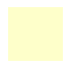

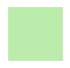

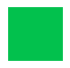

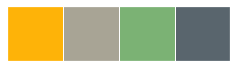

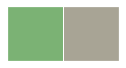

In [15]:
#%%
colors = [ "ecru"]
y_ = sns.xkcd_palette(colors)
sns.palplot(y_)

colors = [ "light sage"]
stemg = sns.xkcd_palette(colors)
sns.palplot(stemg)

colors = [ "shamrock green"]
kellyg = sns.xkcd_palette(colors)
sns.palplot(kellyg)

colors = ["amber", "greyish", "faded green", "slate grey"]
ESPAL = sns.xkcd_palette(colors)
sns.palplot(ESPAL)

colors = ["faded green",  "greyish"]
EPAL = sns.xkcd_palette(colors)
sns.palplot(EPAL)

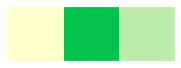

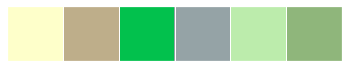

In [16]:
colors = ["ecru","shamrock green", "light sage"]
yg = sns.xkcd_palette(colors)
sns.palplot(yg)

colors = ["ecru",  "putty","shamrock green", "cool grey","light sage", "lichen"]
yg_shuf = sns.xkcd_palette(colors)
sns.palplot(yg_shuf)

# Functions

- add architecture label
- reclassify complex primate enhancers as simple if they do not have a human specific sequence
- format tthe dataframe, call reclassify primate enhancer function, add taxon information
- calculate mann whitney u between columns
- plot stratified MRCA
- get frequency of architecture v. shuffle
- plot arch enh v. shuffle frequency
- plot arch v. shuffle fold-change

In [5]:
def add_arch_labels(df):

    df["arch"] = "complex_core"

    df.loc[df.core_remodeling ==0, "arch"] = "simple"
    df.loc[df.core ==0, "arch"] = "complex_derived"

    return df


def reEval_PrimComplex(enh):

    # get all the complex enhancers w/ primate core ages
    prComEnhID = enh.loc[(enh.core ==1) &
    (enh.core_remodeling ==1) &
    (enh.taxon2.str.contains("Primate"))]["enh_id"].unique()

    # get all the complex enhancer ids where there is a real human derived sequence
    pr_complex = enh.loc[(enh.enh_id.isin(prComEnhID)) &
    (enh.core_remodeling == 1) &
    (enh.core ==0) &
    (enh.mrca ==0),
    ]["enh_id"]


    # i'm going to reassign any primate complex enhancer
    # where derived regions are from other primates
    # get the set of primate complex enhancers w/ primate derived sequences
    # and rename them as simple enhancers
    pr_simple = set(prComEnhID) - set(pr_complex)

    # reassign core and core remodeling columns
    enh.loc[enh.enh_id.isin(pr_simple), "core"] = 1
    enh.loc[enh.enh_id.isin(pr_simple), "core_remodeling"] = 0
    return enh


def format_syndf(enh_age_file):

    syn_cols = ["chr_syn", "start_syn", "end_syn",
    "enh_id",
    "chr", "start", "end",
    "seg_index", "core_remodeling", "core",
    "mrca",]

    syn = pd.read_csv(enh_age_file, sep ='\t', header = None, names = syn_cols)

    syn["syn_id"] = syn.chr_syn + ":" + syn.start_syn.map(str) + "-" + syn.end_syn.map(str)

    syn["syn_len"] = syn.end_syn - syn.start_syn
    syn["enh_len"] = syn.end - syn.start


    # age and taxon file
    syn_gen_bkgd_file = f"/dors/capra_lab/projects/enhancer_ages/{GENOME_BUILD}_syn_gen_bkgd.tsv"
    syn_gen_bkgd= pd.read_csv(syn_gen_bkgd_file, sep = '\t') # read the file
    syn_gen_bkgd[["mrca", "mrca_2"]] = syn_gen_bkgd[["mrca", "mrca_2"]].round(3) # round the ages

    syn_gen_bkgd = syn_gen_bkgd[["mrca", "taxon", "mrca_2", "taxon2"]] # whittle down the df
    syn["mrca"] = syn["mrca"].round(3) # round the ages

    syn = pd.merge(syn, syn_gen_bkgd, how = "left", on = "mrca")
    syn = reEval_PrimComplex(syn)
    syn[syn_cols].to_csv(enh_age_file, sep = "\t", header = False, index = False)
    labeled_syn = add_arch_labels(syn) # add architecture labels

    return labeled_syn

In [6]:
def get_mwu(dataset_col, id_col, test_dif, df, statf):

    results_dict = {}

    for dataset in df[dataset_col].unique(): # simple complex core derived
        print(dataset)
        val_list = [] # two lists for mwu
        median_list = [] # median of list,
        mean_list = [] # mean of list

        id_col_list = df[id_col].unique() # get the variables to compare lists
        comp_name = f"{dataset_col}_{id_col_list[0]}_v_{id_col_list[1]}" # for annotation


        test = df.loc[df[dataset_col] == dataset] # filter dataset on variable

        for comp in id_col_list:
            print(comp)
            values = list(test.loc[(test[id_col] == comp), test_dif])
            val_list.append(values)
            median_list.append(np.median(values))
            mean_list.append(np.mean(values))

        print("val list len", len(val_list))
        stat_, p_ = stats.mannwhitneyu(val_list[0], val_list[1])

        mwu_df = pd.DataFrame({
        "comparison": [comp_name],
        "dataset": [dataset],
        "stat": [stat_],
        "P": [p_],
        f"median{id_col_list[0]}": [median_list[0]],
        f"median{id_col_list[1]}": [median_list[1]],
        f"mean{id_col_list[0]}": [mean_list[0]],
        f"mean{id_col_list[1]}": [mean_list[1]],
        })
        results_dict[dataset] = mwu_df

    results = pd.concat(results_dict.values()) # concat results
    
    with open(stat_f, "a") as writer:
        for i, row in results.iterrows():
            info = row.to_string()
            print(info)
            writer.write(info)

    return results

In [7]:
def plot_mrca_stratified(x, y, data, hue, palette, outf):

    order_dict = {
    "arch" : ["simple", "complex_core", "complex_derived"],
    "mrca_2": list(data.mrca_2.sort_values().unique())
    #"mrca_2" : [0.0, 0.126, 0.131,  0.152, 0.175, 0.308, 0.38, 0.49, 0.656, 0.957]
    }

    hue_order_dict = {
    "arch__": ["simple-cCRE", 'simple-SHUFFLE', 'complex-cCRE', 'complex-SHUFFLE'],
    "id":["cCRE", "SHUFFLE"],
    "id2": ["simple-cCRE", "simple-SHUFFLE", "complex_core-cCRE",
    "complex_core-SHUFFLE", "complex_derived-cCRE", "complex_derived-SHUFFLE"]
    }

    ylab_dict = {
    "syn_len": "syntenic length",
    "pct_enh": "percent\nenhancer sequence"
    }

    xlab_dict = {
    "mrca_2": ["homo", "prim", "euar", "bore", "euth", "ther", "mam", "amni", "tetr", "sarg", "vert"],
    "arch": ["simple", "complex\ncore", "complex\nderived"]
    }

    figsize_dict = {
    "mrca_2": (12,6),
    "arch":(6,6)
    }


    xlabs = xlab_dict[x]
    ylab =  ylab_dict[y]
    order = order_dict[x]
    hue_order = hue_order_dict[hue]
    figsize = figsize_dict[x]
    custom_params = {"axes.spines.right": False, "axes.spines.top": False, "font.size":16}
    sns.set_theme(style="white", font="Roboto", rc=custom_params, font_scale = 1.2)

    fig, ax = plt.subplots(figsize = figsize)
    sns.barplot(x=x, y=y, data = data,
                hue = hue,
                palette = palette,
                order = order,
                hue_order = hue_order, estimator = np.median,
                )

    ax.set(ylabel = ylab, xlabel = "")
    ax.set_xticklabels(xlabs, rotation = 90)
    ax.legend(bbox_to_anchor = (1,1))
    ax.invert_xaxis()
    plt.savefig(outf, bbox_inches = 'tight')

In [8]:
def MRCA_frequency(catdf, cols, var, stat_f):

    age_dict = {} # collect age frequency results per dataset
    summary_age_dict = {} # collect summarized age frequencies per dataset

    for n, dataset in enumerate(catdf["id"].unique()):
        # count n enhancers in architecture per age
        test = catdf.loc[catdf["id"] == dataset]

        age = test.groupby(cols)["enh_id"].count().reset_index()

        # rename columns
        age.columns = cols + ["counts"]

        # sum total n enhancers in architecture
        cols_no_var = list(set(cols) - set([var]))
        totals = age.groupby(cols_no_var)["counts"].sum().reset_index()
        # rename columns
        totals.columns = cols_no_var + ["total_id"]

        # merge dataframes
        age = pd.merge(age, totals, how = "left")

        # calculate the % of architecture in each age
        age["freq"] = age.counts.divide(age.total_id)

        age["dataset_name"] = dataset
        age_dict[n] = age

        # summarize frequencies across architectures, before/after eutherian.
        eutherian = age.loc[age["mrca_2"] == 0.19][[ "id", "freq"]]
        eutherian["category"] = "eutherian"

        younger_thaneuth = age.loc[age["mrca_2"] <0.19].groupby(["id"])["freq"].sum().reset_index()
        younger_thaneuth["category"] = "younger than eutherian"

        older_thaneuth = age.loc[age["mrca_2"] >0.19].groupby(["id"])["freq"].sum().reset_index()
        older_thaneuth["category"] = "older than eutherian"

        summarized_freq = pd.concat([eutherian, younger_thaneuth, older_thaneuth])
        summarized_freq["dataset_name"] = dataset

        summary_age_dict[n] = summarized_freq

    # concat age and summarized frequency dataframes
    ages = pd.concat(age_dict.values())
    summarized_freq = pd.concat(summary_age_dict.values())

    # calculate fold-change of enh v. shuf expectation per shuffle


    # select only the enhancer and specific shuffle instance
    enhdf = ages.loc[ages["id"] == "cCRE"]

    shuf_ = ages.loc[ages["id"] != "cCRE"]

    merge_cols = list(set(cols) - set(["id"]))

    fc = pd.merge(shuf_, enhdf, how = "left", on =merge_cols)

    # calculate fold changes
    fc["fold_change"] = fc["freq_y"].divide(fc["freq_x"])
    
    col_id = "_".join(cols)
    with open(stat_f, "a") as writer:
        writer.write("\n\nages\n\n")
        for i, row in ages.iterrows():
            print(row)
            writer.write(row.to_string())

        writer.write("\n\nfold change\n\n")
        for i, row in fc.iterrows():
            writer.write(row.to_string())

        writer.write("\n\n summarized frequencies\n\n")
        for i, row in summarized_freq.iterrows():
            writer.write(row.to_string())

    return ages, fc

In [9]:
def plot_arch_freq(age_arch_freq, age_freq):
    plots = {"age_arch" : age_arch_freq, "age": age_freq}

    for name, frame in plots.items():

        if name == "age_arch": # arrange order and colors of plot.
            frame["plot_hue"] = frame["arch"].astype(str) + "-" + frame["id"].astype(str)
            order = ["simple-cCRE", "simple-SHUFFLE",
            "complex_core-cCRE", "complex_core-SHUFFLE",
            "complex_derived-cCRE", "complex_derived-SHUFFLE"]
            hue = "plot_hue"
            p = yg

        else:
            order = ["cCRE", "SHUFFLE"]
            hue = "id"
            p = EPAL


        if GENOME_BUILD == "hg38":
            xlabs = ["Prim", "Euar", "Bore", "Euth", "Ther", "Mam", "Amni", "Tetr", "Sarg", "Vert"] # set xlabels
        else:
            xlabs = ["Homo", "Prim", "Euar", "Bore", "Euth", "Ther", "Mam", "Amni", "Tetr", "Vert"]

        custom_params = {"axes.spines.right": False, "axes.spines.top": False, "font.size":16}
        sns.set_theme(style="white", font="Roboto", rc=custom_params, font_scale = 1.2)
        fig, ax = plt.subplots(figsize = (6,6))
        x, y = "mrca_2", "freq"
        data = frame

        sns.barplot(x = x, y=y,
        data = data,
        hue = hue,
        hue_order = order,
        palette = p)

        ax.set_xticklabels(xlabs, rotation = 90)
        ax.legend(bbox_to_anchor = (1,1))

        outf = f"{RE}{name}_freq_per_age.pdf"

        plt.savefig(outf, bbox_inches= "tight")

In [10]:
def plot_arch_fc(age_arch_fc, age_fc, build, arch):
    print(build, arch)
    
    plots = {"age_arch":age_arch_fc, "age_tfbs": age_fc}
    color_dict ={"simple": y_, "complex_core": kellyg, "complex_derived": stemg}
    archs = ["simple", "complex_core", "complex_derived"]

    # don't plot the entire dataset if you just want to plot FC of one architecture.
    if arch in archs:
        plots.pop("age_tfbs")
        print(plots.keys())

    for name, fc in plots.items():

        fc['log2'] = np.log2(fc["fold_change"])


        if name == "age_arch" and arch in archs:
            order = [arch] # set order
            hue = "arch" # set hue
            data = fc.loc[fc.arch == arch] # filter dataset
            p = color_dict[arch] # get the color corresponding to architecture.

        elif name == "age_arch" and arch == "all":
            order = ["simple", "complex_core", "complex_derived"]
            hue = "arch"
            data = fc
            p = yg

        elif name =="age_tfbs":
            arch = None
            order = ["cCRE"]
            hue = "id_y"
            data = fc
            p = EPAL

        backbone_df = age_arch_fc["mrca_2"].copy().drop_duplicates().reset_index()
        data = pd.merge(backbone_df, data, how = "left").fillna(0).sort_values(by = "mrca_2")
        data["counts_y"] = data["counts_y"].astype(int)

        if build == "hg38":
            xlabs = ["Homo","Prim", "Euar", "Bore", "Euth", "Ther", "Mam", "Amni", "Tetr", "Sarg", "Vert"]

        else:
            xlabs = ["Homo", "Prim", "Euar", "Bore", "Euth", "Ther", "Mam", "Amni", "Tetr", "Vert"]

        custom_params = {"axes.spines.right": False, "axes.spines.top": False, "font.size":16}
        sns.set_theme(style="white", font="Roboto", rc=custom_params, font_scale = 1.2)

        fig, ax = plt.subplots(figsize = (6,6))
        x, y = "mrca_2", "log2"


        splot = sns.barplot(x = x, y=y,
        data = data,
        hue = hue,
        hue_order = order,
        palette = p)


        for n, p in enumerate(splot.patches):
            value = data.iloc[n]["counts_y"]
            splot.annotate(value,
                           (p.get_x() + p.get_width() / 2.,0.05),
                           ha = 'center', va = 'baseline',
                           size=15,
                           rotation = 90,
                           color = "k",
                           xytext = (0, 1),
                           textcoords = 'offset points'
                           )

        ax.set(ylabel = "Fold-Change v. Bkgd\n(log2-scaled)", xlabel = "")
        ax.set_xticklabels(xlabs, rotation = 90)
        ax.legend(bbox_to_anchor = (1,1))
        
        ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(2**x))
        ax.yaxis.set_major_formatter(ticks)
        ax.yaxis.set_major_locator(MultipleLocator(1))
        ax.invert_xaxis()
        outf = os.path.join(RE, f"Fig2B_{name}_{arch}_fold_change_per_age.pdf")


    plt.savefig(outf, bbox_inches= "tight")

# get dataframes

merge enh and shuffled

In [11]:
out_df = os.path.join(RE, f"cCRE_{CL}_shuf_df.txt")

if os.path.exists(out_df) is False:
    enh = format_syndf(cCRE)
    enh["id"] = "cCRE"

    shuf = format_syndf(SHUFF)
    shuf["id"] = "SHUFFLE"


    df = pd.concat([enh, shuf])

    df.drop_duplicates()

    df.to_csv(out_df, sep ='\t', index = False)
else:
    df = pd.read_csv(out_df, sep = "\t")

combine enhancer and shuffled dataframes 

# summarize architecture lengths per enhancer

In [12]:
out_f = os.path.join(RE, f"sum_{CL}_arch_len.txt")

if os.path.exists(out_f) is False:

    sum_archlen = df.groupby(['id', 'enh_id', 'enh_len', 'core_remodeling', 'core'])["syn_len"].sum().reset_index().drop_duplicates()

    sum_archlen = add_arch_labels(sum_archlen) # add architecture labels

     # calculate percent arch per enhancer
    sum_archlen["pct_enh"] = sum_archlen.syn_len.divide(sum_archlen.enh_len)


    # add oldest ages of enhancer information
    enh_mrcas = df.groupby("enh_id")[["mrca_2", "taxon2"]].max().reset_index()
    sum_archlen = pd.merge(sum_archlen, enh_mrcas, how = "left", on = "enh_id")


    shuf_remove_ids = sum_archlen.loc[(sum_archlen["mrca_2"] == 0) & (sum_archlen.core ==0), "enh_id"]
    sum_archlen = sum_archlen[~sum_archlen["enh_id"].isin(shuf_remove_ids)]

    ## summarize simple v. complex architectures only

    sum_archlen["arch_"] = "simple"
    sum_archlen.loc[sum_archlen.core_remodeling ==1, "arch_"] = "complex"
    sum_archlen["arch__"] = sum_archlen["arch_"] + "-" + sum_archlen['id']

    # add column for plotting purposes
    sum_archlen["id2"] = sum_archlen["arch"] + "-" + sum_archlen["id"]

    sum_archlen.to_csv(out_f, sep = '\t', index = False)
else:
    sum_archlen = pd.read_csv(out_f, sep = '\t')

# Plots

## age, arch x syn length

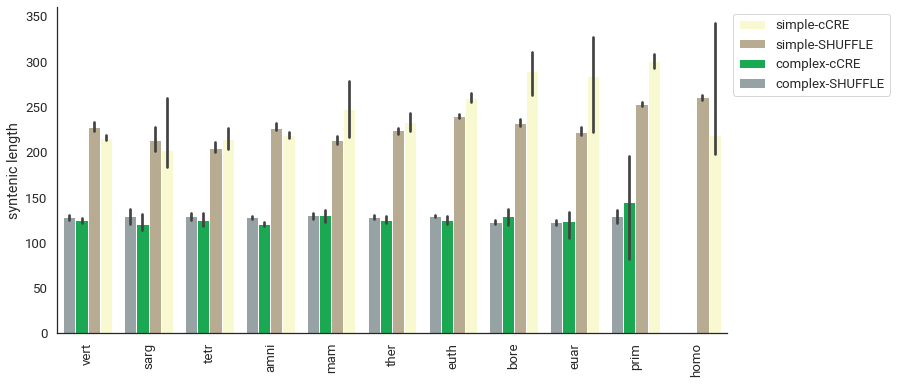

In [17]:
x = "mrca_2"
y = "syn_len"
data = sum_archlen#.sample(frac = 0.05)
hue = "arch__"
palette = yg_shuf
outf = f"{RE}ALL_mrca_x_syn_lengths_arch.pdf"

plot_mrca_stratified(x, y, data, hue, palette, outf)

## FigS-EnhvShuf-synLen
### arch,  syn length

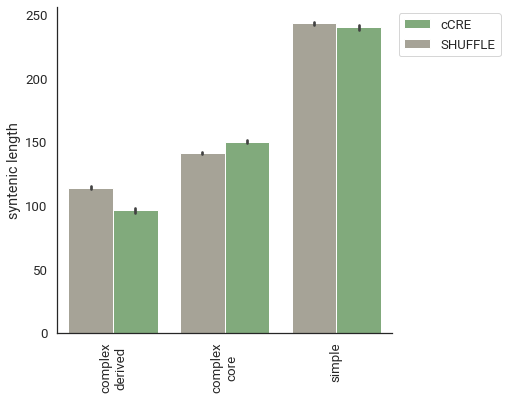

In [18]:
x = "arch"
y = "syn_len"
hue = "id"
palette = EPAL

outf = f"{RE}FigS-EnhvShuf-synLen_cCRE_shuffle.pdf"

plot_mrca_stratified(x, y, data, hue, palette, outf)

### arch,  pct enhancer

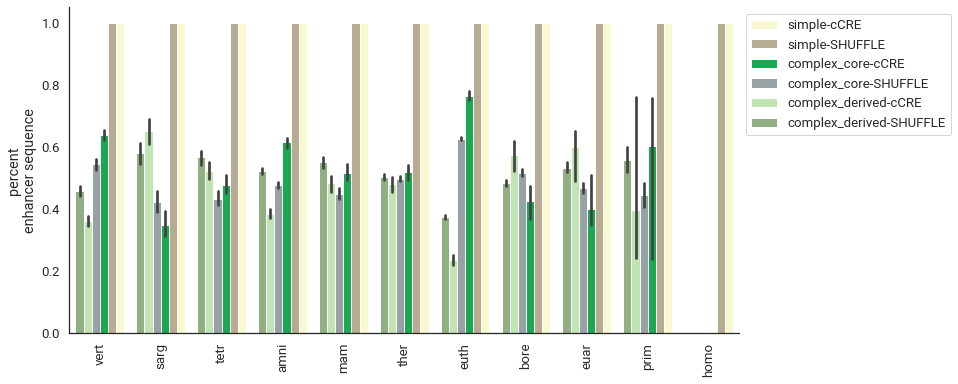

In [19]:
x = "mrca_2"
y = "pct_enh"
hue = "id2"
palette = yg_shuf
outf = f"{RE}ALL_cCRE_percent_arch_mrca_2.pdf"
plot_mrca_stratified(x, y, data, hue, palette, outf)

## FigS CorDer_v_ShufLen
### stratify syn length by age

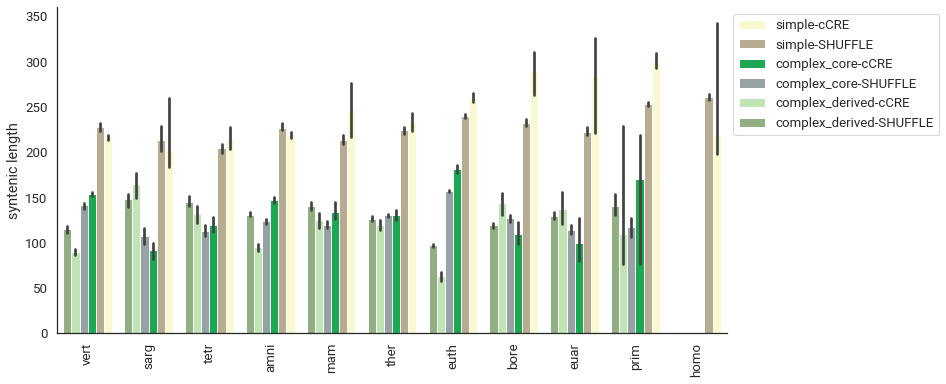

In [20]:
x = "mrca_2"
y = "syn_len"
hue = "id2"
palette = yg_shuf
outf = f"{RE}FigS_CorDer_v_ShufLen_mrca2.pdf"
plot_mrca_stratified(x, y, data, hue, palette, outf)

##  percent architecture

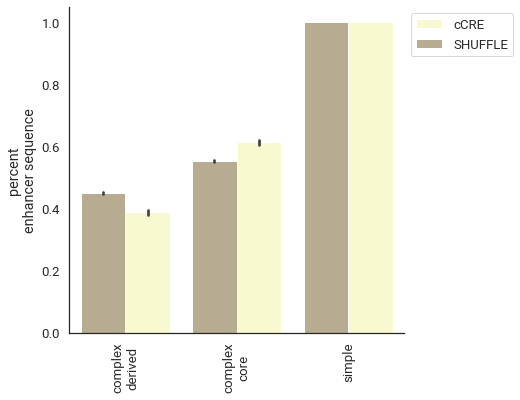

In [21]:
x = "arch"
y = "pct_enh"
hue = "id"
outf = f"{RE}ALL_cCRE_percent_all.pdf"
sns.set(font="Roboto")
plot_mrca_stratified(x, y, data, hue, palette, outf)

# Figure 1, 2A - pie charts

In [22]:
pie_ = data.loc[data.id == "cCRE"][["arch_", "enh_id"]].drop_duplicates().groupby(["arch_"])["enh_id"].count().reset_index()


with open(stat_f, "a") as writer:
    writer.write("\n\n # percent of simple and complex #\n\n")
    for i, row in pie_.iterrows():
        writer.write(row.to_string())
pie_

,arch_,enh_id
0,complex,23982
1,simple,22206


In [23]:
list(data)

['id',
 'enh_id',
 'enh_len',
 'core_remodeling',
 'core',
 'syn_len',
 'arch',
 'pct_enh',
 'mrca_2',
 'taxon2',
 'arch_',
 'arch__',
 'id2']

In [24]:
pie_ = data.loc[data.id == "cCRE"][["arch__", "enh_id"]].drop_duplicates().groupby(["arch__"])["enh_id"].count().reset_index()
pie_

,arch__,enh_id
0,complex-cCRE,23982
1,simple-cCRE,22206


In [25]:
piedf = data.loc[(data.id == "cCRE") & (data.core_remodeling ==1)][["arch", "pct_enh"]].groupby(["arch"])["pct_enh"].median().reset_index()
with open(stat_f, "a") as writer:
    writer.write("\n\n # % core, derived per complex enh#\n\n")
    for i, row in piedf.iterrows():
        writer.write(row.to_string())

In [26]:
pie_

,arch__,enh_id
0,complex-cCRE,23982
1,simple-cCRE,22206


([<matplotlib.patches.Wedge at 0x7f4f05782048>,
 [Text(-1.2193708670444028, -0.4507046578452248, 'complex_core'),
  Text(1.031775349037572, 0.3813654797151896, 'complex_derived')],
 [Text(-0.7503820720273249, -0.27735671252013827, '61%'),
  Text(0.5627865540204937, 0.20801753439010337, '39%')])

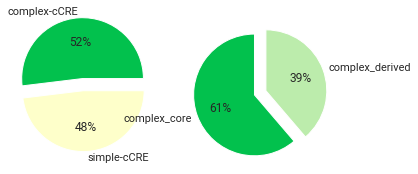

In [27]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style = "white", font="Roboto", rc=custom_params)
fig, (ax1, ax2) = plt.subplots(ncols = 2)


y = np.array(pie_.enh_id)
mylabels = list(pie_.arch__)
colors = [ "shamrock green", "ecru"]
amber = sns.xkcd_palette(colors)
myexplode = [0.2, 0]
ax1.pie(y, labels = mylabels, colors = amber, explode = myexplode, autopct='%1.0f%%')
outf = f"{RE}Fig1_Fig2A_pie_chart_arch.pdf"
plt.savefig(outf, bbox_inches = "tight")


y = np.array(piedf.pct_enh)
mylabels = list(piedf.arch)
colors = [ "shamrock green", "light sage"]
amber = sns.xkcd_palette(colors)
myexplode = [0.2, 0]
ax2.pie(y, labels = mylabels, colors = amber, explode = myexplode, autopct='%1.0f%%', startangle = 90)


# Figure 2A 
## stacked barplot: syn lengths

### stratify syn lengths by age -- means

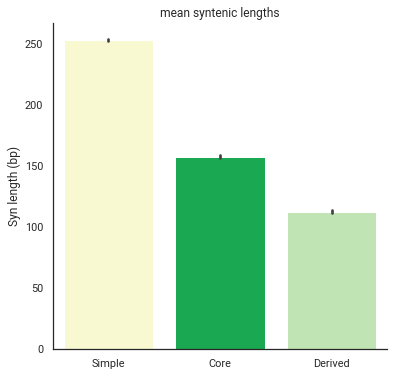

In [28]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font="Roboto", rc=custom_params)
order = ['simple', 'complex_core', 'complex_derived']
labels = ['Simple', 'Core', 'Derived']


fig, ax = plt.subplots(figsize = (6,6))

sns.barplot(x = "arch", y = "syn_len", 
            data =  data.loc[(data.id == "cCRE")], 
            estimator = np.mean,
            palette = yg,
            order = order)
ax.set_xticklabels(labels)

ax.set(ylabel = 'Syn length (bp)', title = 'mean syntenic lengths', xlabel = "")
#ax.legend()


outf = f"{RE}bar_arch_syn_len-mean.pdf"
plt.savefig(outf, bbox_inches = "tight")

### stratify syn lengths by age -- medians

In [29]:
d = data.loc[data.id == "cCRE"][["enh_id","arch", "syn_len"]].drop_duplicates()
s = d.loc[d["arch"] == "simple", "syn_len"]
c = d.loc[d["arch"] == "complex_core", "syn_len"]
dr = d.loc[d["arch"] == "complex_derived", "syn_len"]

s, p = stats.mannwhitneyu(c, dr) 
with open(stat_f, "a") as writer:
    writer.write(f"\n\nMWU core v. der syn length: mwu={s}, p = {p}")

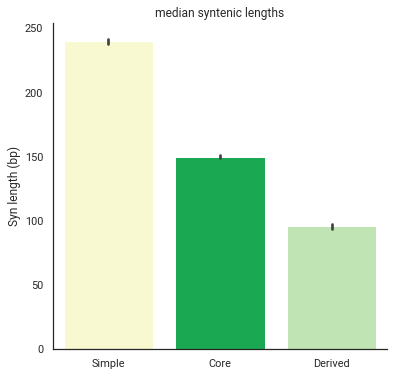

In [30]:
order = ['simple', 'complex_core', 'complex_derived']
labels = ['Simple', 'Core', 'Derived']

custom_params = {"axes.spines.right": False, "axes.spines.top": False}

sns.set_theme(style="white", font="Roboto", rc=custom_params)
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x="arch", y="syn_len",
            data=data.loc[(data.id == "cCRE")],
            estimator=np.median,
            palette=yg, 
            order=order)
ax.set_xticklabels(labels)

ax.set(ylabel = 'Syn length (bp)', title = 'median syntenic lengths', xlabel = "")

# ax.legend()


outf = f"{RE}bar_arch_syn_len-median.pdf"
plt.savefig(outf, bbox_inches="tight")

## stratify syn length by age

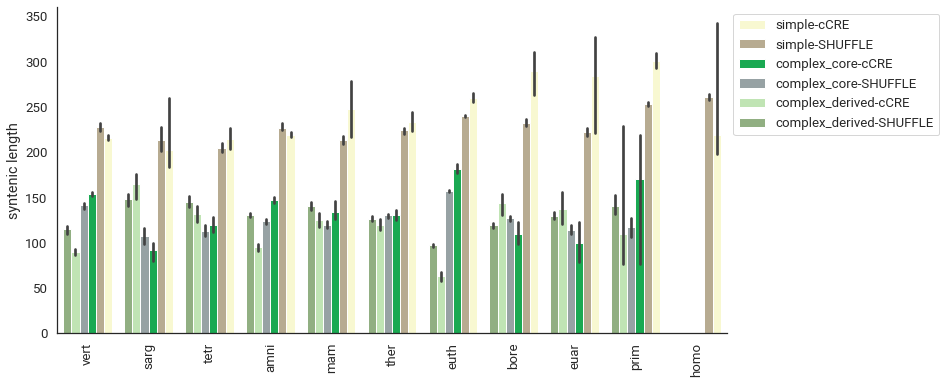

In [31]:
x = "mrca_2"
y = "syn_len"
hue = "id2"
palette = yg_shuf
outf = f"{RE}ALL_cCRE_syn_len_mrca_2.pdf"
plot_mrca_stratified(x, y, data, hue, palette, outf)

## mean lengths

In [32]:
comp = "all_cCRE_v_shuffle"

lens = sum_archlen.groupby(["id", "arch"])["syn_len"].mean().reset_index()
pcts = sum_archlen.groupby(["id", "arch"])["pct_enh"].mean().reset_index()

with open(stat_f, "a") as writer:
    writer.write("\n\n#syn_len#\n\n")
    for i, row in lens.iterrows():
        writer.write(row.to_string())
    writer.write("\n\n#percent_syn_len#\n\n")
    for i, row in pcts.iterrows():
        writer.write(row.to_string())

## quantify mwu on architecture, comparing cCRE v. SHUFFLE ids

In [33]:
dataset_col = "arch" # first level - simple, complex core, complex derived
id_col = "id" # do mwu separating on this variable
test_dif = "syn_len" # calculate mwu from these variables' values

mwu_df = get_mwu( dataset_col, id_col, test_dif, sum_archlen, stat_f)

#%% do mwu on architecture, comparing cCRE v. cCRE ids

dataset_col = "arch" # first level - simple, complex core, complex derived
id_col = "arch" # do mwu separating on this variable
test_dif = "syn_len" # calculate mwu from these variables' values

mwu_df = get_mwu( dataset_col, id_col, test_dif, sum_archlen, stat_f)

complex_derived
SHUFFLE
cCRE
val list len 2
complex_core
SHUFFLE
cCRE
val list len 2
simple
SHUFFLE
cCRE
val list len 2
comparison       arch_SHUFFLE_v_cCRE
dataset              complex_derived
stat                     1.00382e+09
P                        2.00326e-88
medianSHUFFLE                    114
mediancCRE                        96
meanSHUFFLE                  124.944
meancCRE                     112.683
comparison       arch_SHUFFLE_v_cCRE
dataset                 complex_core
stat                     1.04656e+09
P                        1.76674e-26
medianSHUFFLE                    141
mediancCRE                       150
meanSHUFFLE                  149.859
meancCRE                     157.692
comparison       arch_SHUFFLE_v_cCRE
dataset                       simple
stat                     1.67706e+09
P                         0.00321874
medianSHUFFLE                    243
mediancCRE                       240
meanSHUFFLE                   254.86
meancCRE                     

/home/fongsl/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fongsl/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/fongsl/.local/lib/python3.6/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


complex_derived
complex_core
simple
val list len 3
comparison               arch_complex_derived_v_complex_core
dataset                                      complex_derived
stat                                                       0
P                                                          0
mediancomplex_derived                                    110
mediancomplex_core                                       NaN
meancomplex_derived                                  122.394
meancomplex_core                                         NaN
comparison               arch_complex_derived_v_complex_core
dataset                                         complex_core
stat                                                       0
P                                                          0
mediancomplex_derived                                    NaN
mediancomplex_core                                       143
meancomplex_derived                                      NaN
meancomplex_core                  

In [34]:
#%% get arch counts

arch_count = enh[["core_remodeling", "enh_id"]].drop_duplicates().groupby("core_remodeling")["enh_id"].count().reset_index()
arch_count.columns = ["core_remodeling", "count_arch"]
arch_count["total"] = arch_count.count_arch.sum()
arch_count["percent"] = arch_count.count_arch.divide(arch_count.total)

with open(stat_f, "a") as writer:
    writer.write("\n\n#percent_syn_len#\n\n")
    for i, row in arch_count.iterrows():
        writer.write(row.to_string())

# GET MRCA FREQUENCIES

In [35]:
cols = ["id", "arch", "mrca_2"]
var = "mrca_2"
age_arch_freq, age_arch_fc = MRCA_frequency(df, cols, var, stat_f)


cols = ["id", "mrca_2"]
var = "mrca_2"
age_freq, age_fc = MRCA_frequency(df, cols, var, stat_f)


#%%

id                      cCRE
arch            complex_core
mrca_2                 0.144
counts                    16
total_id               34067
freq             0.000469663
dataset_name            cCRE
Name: 0, dtype: object
id                      cCRE
arch            complex_core
mrca_2                 0.146
counts                   196
total_id               34067
freq              0.00575337
dataset_name            cCRE
Name: 1, dtype: object
id                      cCRE
arch            complex_core
mrca_2                 0.167
counts                   935
total_id               34067
freq               0.0274459
dataset_name            cCRE
Name: 2, dtype: object
id                      cCRE
arch            complex_core
mrca_2                  0.19
counts                  6625
total_id               34067
freq                 0.19447
dataset_name            cCRE
Name: 3, dtype: object
id                      cCRE
arch            complex_core
mrca_2                 0.425
counts   

id                     cCRE
mrca_2                    0
counts                   53
total_id             102267
freq            0.000518251
dataset_name           cCRE
Name: 0, dtype: object
id                   cCRE
mrca_2              0.144
counts               6815
total_id           102267
freq            0.0666393
dataset_name         cCRE
Name: 1, dtype: object
id                   cCRE
mrca_2              0.146
counts               2901
total_id           102267
freq            0.0283669
dataset_name         cCRE
Name: 2, dtype: object
id                   cCRE
mrca_2              0.167
counts               8646
total_id           102267
freq            0.0845434
dataset_name         cCRE
Name: 3, dtype: object
id                  cCRE
mrca_2              0.19
counts             25452
total_id          102267
freq            0.248878
dataset_name        cCRE
Name: 4, dtype: object
id                  cCRE
mrca_2             0.425
counts              9284
total_id          102267

In [36]:
age_arch_fc.head()

,id_x,arch,mrca_2,counts_x,total_id_x,freq_x,dataset_name_x,id_y,counts_y,total_id_y,freq_y,dataset_name_y,fold_change
0,SHUFFLE,complex_core,0.144,748,125960,0.005938,SHUFFLE,cCRE,16,34067,0.000470,cCRE,0.079089
1,SHUFFLE,complex_core,0.146,3548,125960,0.028168,SHUFFLE,cCRE,196,34067,0.005753,cCRE,0.204254
2,SHUFFLE,complex_core,0.167,15476,125960,0.122864,SHUFFLE,cCRE,935,34067,0.027446,cCRE,0.223384
3,SHUFFLE,complex_core,0.190,61789,125960,0.490545,SHUFFLE,cCRE,6625,34067,0.194470,cCRE,0.396436
4,SHUFFLE,complex_core,0.425,13358,125960,0.106050,SHUFFLE,cCRE,2645,34067,0.077641,cCRE,0.732121


In [37]:
mrcas = age_arch_fc["mrca_2"].drop_duplicates()
pd.merge(mrcas, age_arch_fc.loc[age_arch_fc.arch == "complex_derived"][["mrca_2", "counts_y"]], how = "left")


,mrca_2,counts_y
0,0.144,4152.0
1,0.146,2619.0
2,0.167,7251.0
3,0.190,10495.0
4,0.425,5381.0
5,0.497,2874.0
6,0.606,9073.0
7,0.656,2156.0
8,0.756,1400.0
9,0.867,NaN


# Fold change, all archs in one graph

In [38]:
#plot_arch_freq(age_arch_freq, age_freq)
#plot_arch_fc(age_arch_fc, age_fc, GENOME_BUILD, "all")

# Figure 2B
## Fold change

### derived v. shuffle

hg38 complex_derived
dict_keys(['age_arch'])


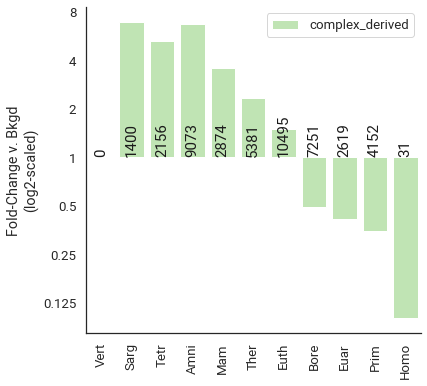

In [39]:
plot_arch_fc(age_arch_fc, age_fc, GENOME_BUILD, "complex_derived")

### complex core v. shuffle

hg38 complex_core
dict_keys(['age_arch'])


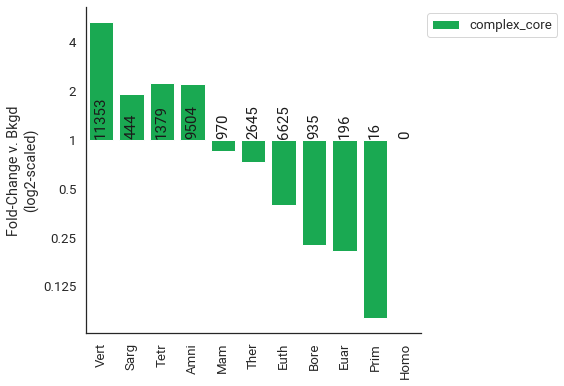

In [40]:
plot_arch_fc(age_arch_fc, age_fc,GENOME_BUILD, "complex_core")

### simple v. simple shuffle

hg38 simple
dict_keys(['age_arch'])


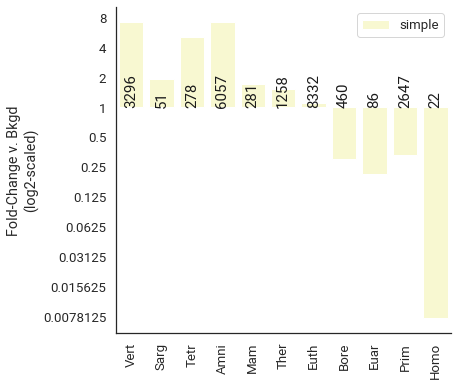

In [41]:
plot_arch_fc(age_arch_fc, age_fc, GENOME_BUILD, "simple")

In [42]:
der = df.loc[df.core == 0]
der_enh = der.loc[der.id == "cCRE", "mrca_2"]
der_shuf = der.loc[der.id == "SHUFFLE", "mrca_2"]
stats.mannwhitneyu(der_enh, der_shuf)
der.groupby("id")["mrca_2"].median()

id
SHUFFLE    0.167
cCRE       0.190
Name: mrca_2, dtype: float64

In [43]:
"""
id
cCRE     0.175
SHUFFLE    0.152
Name: mrca_2, dtype: float64
"""
der.groupby("id")["mrca_2"].mean()
"""
id
cCRE     0.206010
SHUFFLE    0.172115
Name: mrca_2, dtype: float64
"""

'\nid\ncCRE     0.206010\nSHUFFLE    0.172115\nName: mrca_2, dtype: float64\n'